In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

courses_file = '../data/Coursera_courses.csv'
coursedata_file = '../data/Coursera.csv'
ratings_file = '../data/Coursera_reviews.csv'

df_courses = pd.read_csv(courses_file)
df_coursedata = pd.read_csv(coursedata_file)
df_ratings = pd.read_csv(ratings_file)

In [8]:
print(df_courses.head())
print(df_coursedata.head())
print(df_ratings.head())

# Basic statistics
print(df_ratings.describe())


                                                name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  \
0        Stanford University   
1      University of Alberta   
2            Yale University   
3                     Google   
4  Google - Spectrum Sharing   

                                          course_url  \
0    https://www.coursera.org/learn/machine-learning   
1   https://www.coursera.org/learn/indigenous-canada   
2  https://www.coursera.org/learn/the-science-of-...   
3  https://www.coursera.org/learn/technical-suppo...   
4  https://www.coursera.org/learn/google-cbrs-cpi...   

                        course_id  
0                machine-learning  
1               indigenous-canada  
2       the-science-of-we

In [9]:
df_courses.merge(
    df_coursedata,
    left_on='course_url',
    right_on='Course URL',
    how='inner'
).shape

df_coursedata['Course ID'] = df_coursedata['Course URL'].str.split('/').str[-1]


df_courses_full = df_courses.merge(
    df_coursedata.drop_duplicates('Course ID', keep='first'),
    left_on='course_id',
    right_on='Course ID',
    how='inner'
)

In [10]:
df_courses_full

,name,institution,course_url,course_id,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Course ID
0,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,The Science of Well-Being,Yale University,Intermediate,4.8,https://www.coursera.org/learn/the-science-of-...,In this course you will engage in a series of ...,positive psychology mindfulness gratitude h...,the-science-of-well-being
1,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,Technical Support Fundamentals,Google,Conversant,4.8,https://www.coursera.org/learn/technical-suppo...,This course is the first of a series that aims...,binary code internet Troubleshooting PC Har...,technical-support-fundamentals
2,Financial Markets,Yale University,https://www.coursera.org/learn/financial-marke...,financial-markets-global,Financial Markets,Yale University,Intermediate,4.6,https://www.coursera.org/learn/financial-marke...,"An overview of the ideas, methods, and institu...",Finance Planning Leadership and Management ...,financial-markets-global
3,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology,Introduction to Psychology,Yale University,Beginner,4.8,https://www.coursera.org/learn/introduction-ps...,What are people most afraid of? What do our dr...,human behavior Critical Thinking happiness ...,introduction-psychology
4,Programming for Everybody (Getting Started wit...,University of Michigan,https://www.coursera.org/learn/python,python,Programming for Everybody (Getting Started wit...,University of Michigan,Conversant,4.8,https://www.coursera.org/learn/python,This course aims to teach everyone the basics ...,syntax language semantics Computer Programm...,python
...,...,...,...,...,...,...,...,...,...,...,...,...
477,Hypothesis-Driven Development,University of Virginia,https://www.coursera.org/learn/uva-darden-agil...,uva-darden-agile-testing,Hypothesis-Driven Development,University of Virginia,Intermediate,4.6,https://www.coursera.org/learn/uva-darden-agil...,"To deliver agile outcomes, you have to do more...",test-driven development software hypothesis ...,uva-darden-agile-testing
478,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,Advanced,3.6,https://www.coursera.org/learn/accounting-data...,This course focuses on developing Python skill...,data type relational database management syst...,accounting-data-analytics-python
479,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy,Introduction to Molecular Spectroscopy,University of Manchester,Beginner,4.7,https://www.coursera.org/learn/spectroscopy,The course introduces the three key spectrosco...,interpretation Chemical Engineering analysis...,spectroscopy
480,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution,The fundamentals of hotel distribution,ESSEC Business School,Intermediate,4.7,https://www.coursera.org/learn/hotel-distribution,In today�s hotel sector an increasingly comple...,Hotel Management revenue management distribu...,hotel-distribution


## Ratings Distrubution
Visualising the distribution of ratings.

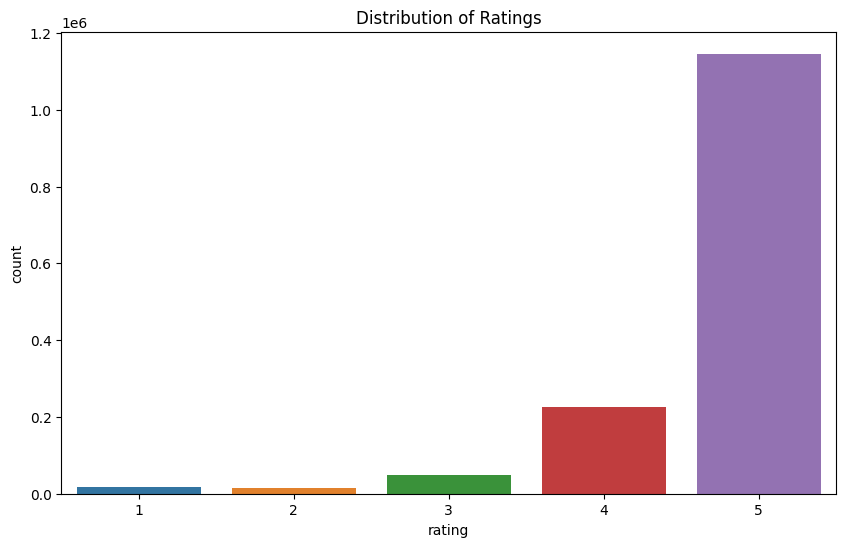

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_ratings)
plt.title('Distribution of Ratings')
plt.show()


## Course Popularity
Analysing which courses are rated most frequently.

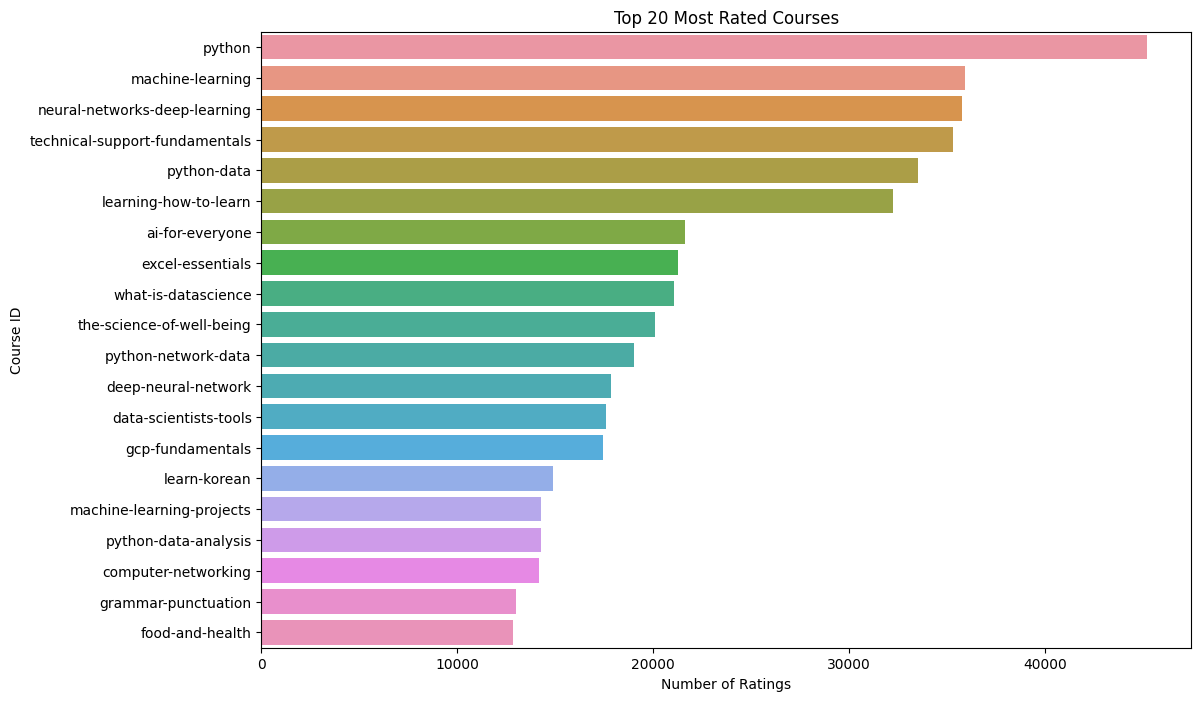

In [12]:
course_popularity = df_ratings['course_id'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=course_popularity.values, y=course_popularity.index)
plt.title('Top 20 Most Rated Courses')
plt.xlabel('Number of Ratings')
plt.ylabel('Course ID')
plt.show()


## User Activity
Examining how many ratings each user has given.

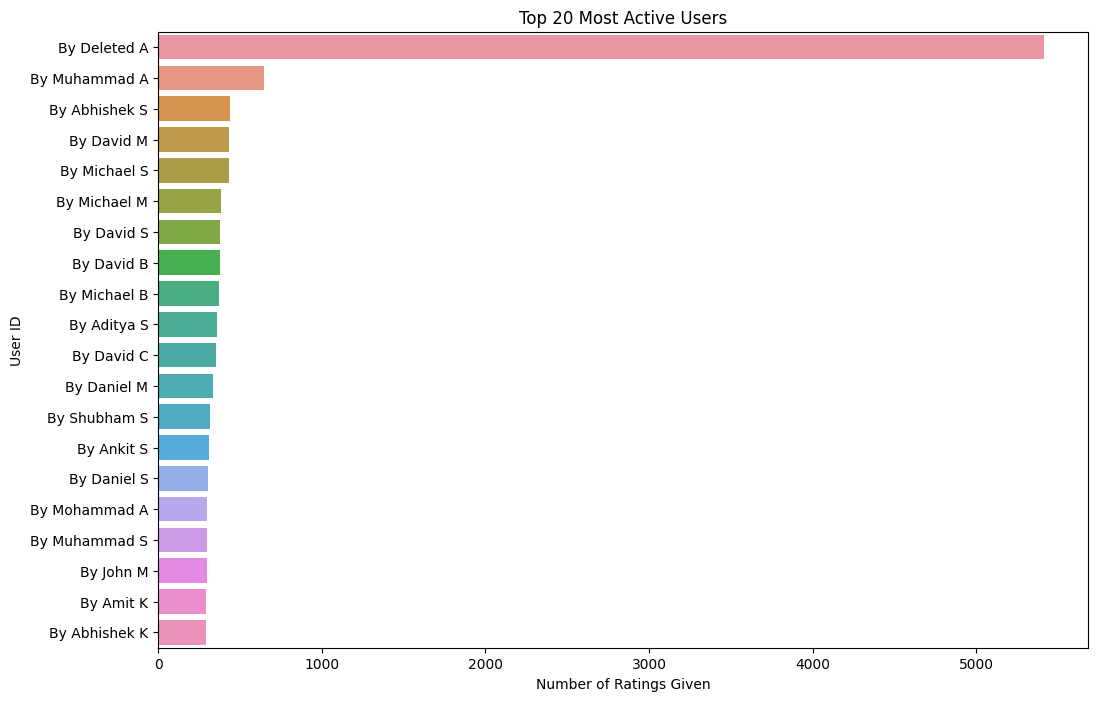

In [13]:
user_activity = df_ratings['reviewers'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=user_activity.values, y=user_activity.index)
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Ratings Given')
plt.ylabel('User ID')
plt.show()


And without "Deleted A"

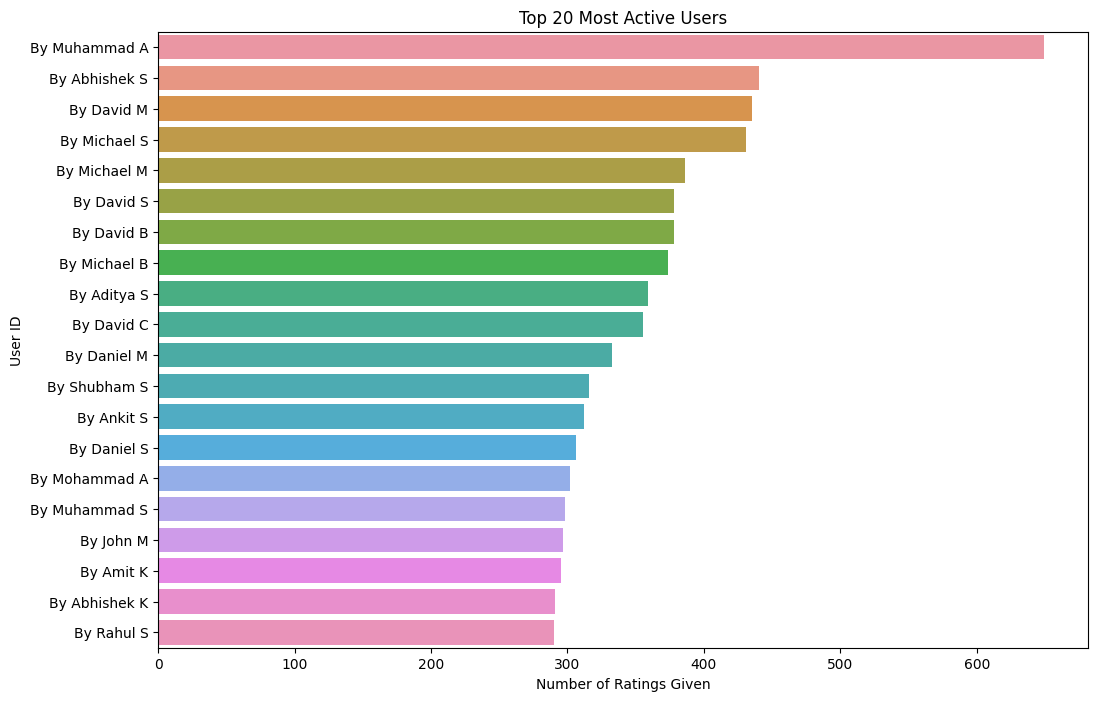

In [14]:
df_ratings_fixed = df_ratings.copy()
# Removing "Deleted A" reviewers
df_ratings_fixed = df_ratings_fixed[df_ratings_fixed['reviewers'] != 'By Deleted A']

user_activity = df_ratings_fixed['reviewers'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=user_activity.values, y=user_activity.index)
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Ratings Given')
plt.ylabel('User ID')
plt.show()


## Course Difficulty Level Distribution
Analysis of difficulty level distribution.

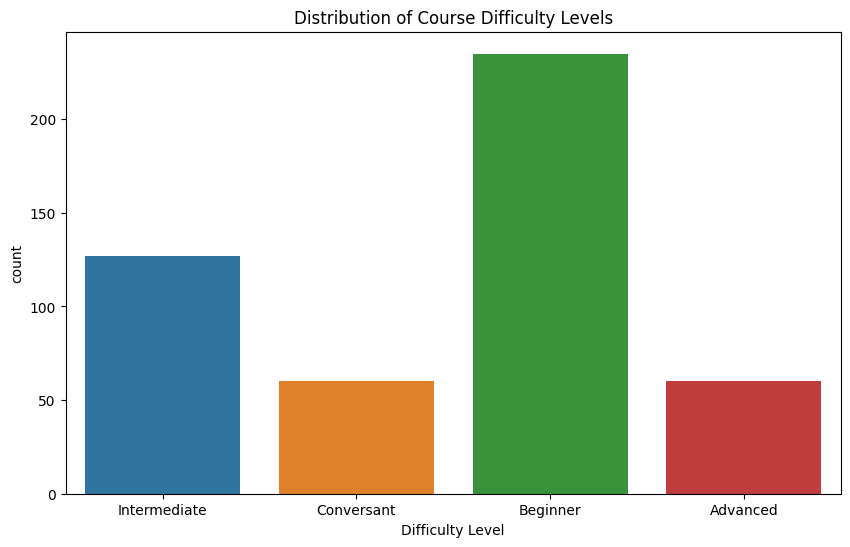

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Difficulty Level', data=df_courses_full)
plt.title('Distribution of Course Difficulty Levels')
plt.show()

## Rating vs Difficulty Level
Investigate if there is any relationship between the difficulty level of a course and its ratings.

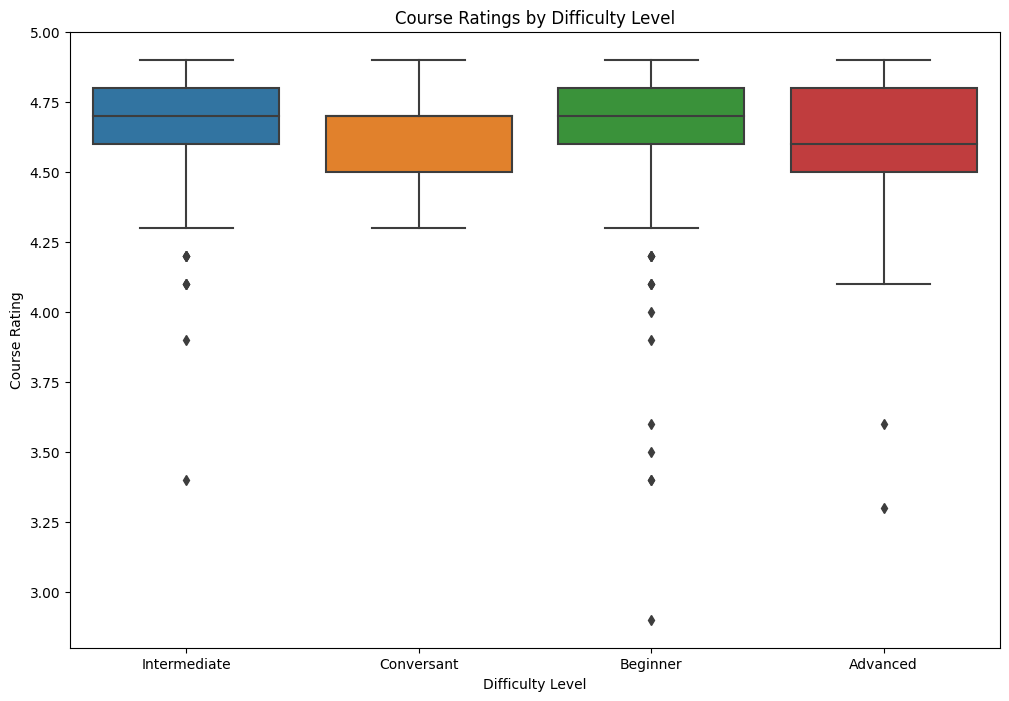

In [16]:
# Making Course Ratings Numeric
df_courses_full['Course Rating'] = df_courses_full['Course Rating'].str.split('/').str[0].astype(float)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Difficulty Level', y='Course Rating', data=df_courses_full)
plt.title('Course Ratings by Difficulty Level')
plt.show()

From this, we can see that Intermediate courses have a tight distribution of ratings around the median, indicating consistency in ratings. With a few outliers who rated it lower.
Conversant courses have a bit lower median rating than Intermediate courses, with more variability seen by the taller box.
Beginner courses have a distribution similar to Conversant courses but with a slightly higher median rating. The presence of some outliers is also seen here.
Advanced courses have the widest range of ratings, which suggests that users opinions on these courses vary more significantly than the other levels. There are less outliers for these than Beginner courses.

## Sparsity of the User-Item Matrix
Trying to calculate/visualise the sparsity of the user-item matrix.
(not working atm)

In [18]:
user_item_matrix = df_ratings.pivot_table(index='reviewers', columns='course_id', values='rating', fill_value=0)
matrix_sparsity = np.count_nonzero(user_item_matrix) / user_item_matrix.size

plt.figure(figsize=(6, 4))
sns.heatmap(user_item_matrix == 0, vmin=0, vmax=1, cmap='viridis')
plt.title(f"User-Item matrix sparsity: {matrix_sparsity:.2%}")
plt.show()

: 